In [ ]:
!pip install image_slicer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from numpy import ndarray
import os
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array 
import cv2
from PIL import Image
import PIL
import image_slicer
from PIL import ImageDraw, ImageFont

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# We import the model 
model = keras.models.load_model('/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/modelo_david.h5')

In [ ]:
path_prueba = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/imagenes_prueba/prueba.jpg'
path_prueba2 = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/imagenes_prueba/prueba2.jpg'
path_prueba3 = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/imagenes_prueba/prueba3.jpg'
path_prueba4 = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/imagenes_prueba/prueba4.jpg'
path_prueba5 = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/imagenes_prueba/prueba5.png'
path_pruebaoasis = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/imagenes_prueba/pruebaoasis.jpg'
path_pruebaxxx = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/imagenes_prueba/pruebaxxx.jpg'
path_pruebayyy = '/content/drive/MyDrive/AI_HACKATHON/DATOS_IMAGENES/imagenes_prueba/pruebayyy.jpg'
class_names = ['cloudy', 'desert', 'green_area', 'water']

In [ ]:
def testimages(path_test):
  img = tf.keras.utils.load_img(
    path_test, target_size=(256, 256)
  )
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
  print(score*100)
  return(img)

In [ ]:
testimages(path_prueba2)

NameError: ignored

In [ ]:
# We define a function to split an image in smaller tiles which then we will analyze one by one
def slicing_image(path_testing,number_tiles):
  tiles = image_slicer.slice(path_testing, number_tiles, save=False)
  for tile in tiles:
   overlay = ImageDraw.Draw(tile.image)
   overlay.text((5, 5), str(tile.number), (255, 255, 255),
        ImageFont.load_default())
  return(tiles)

In [ ]:
tiles = slicing_image(path_pruebayyy,36)

In [ ]:
def testimages1(img):
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(
      "This image most likely belongs to {} with a {:.2f} percent confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score))
  )
  return(img)

This image most likely belongs to desert with a 100.00 percent confidence.


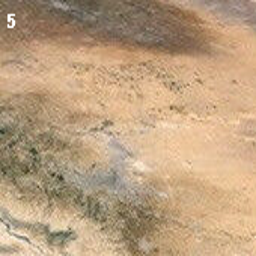

In [ ]:
# We test for tile number 5.
testimages1(tiles[4].image.resize((256,256)))

In [ ]:
# We build a function which return the class_name with the max score
def testimages2(img):
  img_array = tf.keras.utils.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  return(class_names[np.argmax(score)])

In [ ]:
def analyzeimages(path_testing,number_tiles):
  img = tf.keras.utils.load_img(
    path_testing, target_size=(256, 256)
  )
  tiles = slicing_image(path_testing,number_tiles)
  My_list = []
  for i in range(0, 32):
      string = testimages2(tiles[i].image.resize((256,256)))
      My_list.append(string)
      per_cloudy = My_list.count('cloudy')/len(My_list)*100
      per_desert = My_list.count('desert')/len(My_list)*100
      per_green = My_list.count('green_area')/len(My_list)*100
      per_water = My_list.count('water')/len(My_list)*100
  print(
      "This image has {} percentage of cloudy, a {} percentage of desert, a {} percentage of green_area and a {} percentage of water"
      .format(per_cloudy,per_desert,per_green,per_water)
  )
  return(img)


**DEMONSTRATION**

This image has 3.125 percentage of cloudy, a 65.625 percentage of desert, a 3.125 percentage of green_area and a 28.125 percentage of water


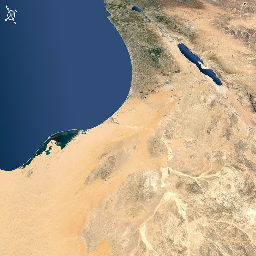

In [ ]:
analyzeimages(path_pruebayyy,36)

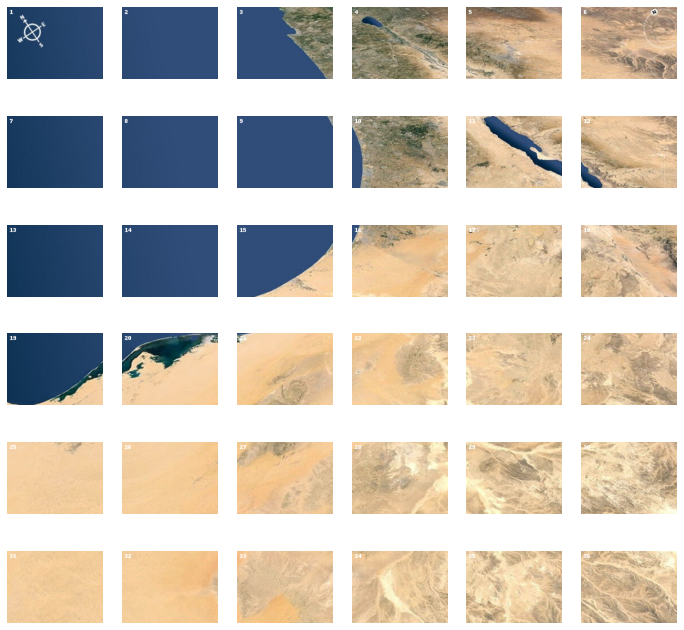

In [ ]:
tiles = slicing_image(path_pruebayyy,36)
plt.figure(figsize=(12, 12))
for i in range(0, 36):
  
  ax = plt.subplot(6, 6, i + 1)
  plt.subplots_adjust(hspace = .001)
  plt.imshow(tiles[i].image)
  plt.axis("off")

This image has 65.625 percentage of cloudy, a 12.5 percentage of desert, a 6.25 percentage of green_area and a 15.625 percentage of water


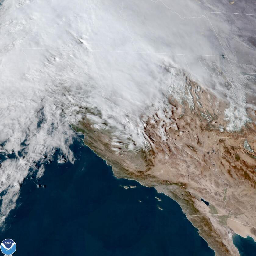

In [ ]:
analyzeimages(path_pruebaxxx,36)

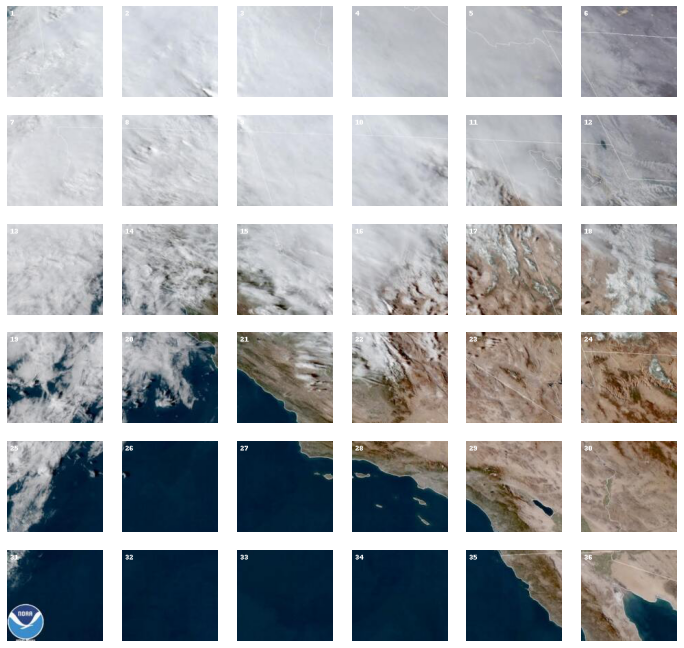

In [ ]:
tiles = slicing_image(path_pruebaxxx,36)
plt.figure(figsize=(12, 12))
for i in range(0, 36):
  
  ax = plt.subplot(6, 6, i + 1)
  plt.subplots_adjust(hspace = .001)
  plt.imshow(tiles[i].image)
  plt.axis("off")